In [31]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [32]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)
stk_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-01-01,SBIN,EQ,2385.50,2404.90,2434.05,2397.55,2425.30,2426.45,2423.75,1720230,4.169403e+14,64215,662638,0.3852
2013-01-02,SBIN,EQ,2426.45,2450.00,2464.00,2438.15,2451.90,2450.55,2453.53,1466012,3.596900e+14,61823,508795,0.3471
2013-01-03,SBIN,EQ,2450.55,2460.00,2482.40,2436.20,2470.70,2471.60,2465.12,2010309,4.955653e+14,71411,820537,0.4082
2013-01-04,SBIN,EQ,2471.60,2460.00,2492.95,2450.65,2490.00,2486.70,2475.69,1370595,3.393164e+14,62637,231546,0.1689
2013-01-07,SBIN,EQ,2486.70,2490.00,2499.00,2461.75,2465.00,2467.60,2481.24,1026449,2.546866e+14,48683,269798,0.2628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,SBIN,EQ,291.90,293.50,295.00,290.15,293.50,293.05,292.60,12048877,3.525492e+14,91297,2344946,0.1946
2018-12-26,SBIN,EQ,293.05,292.85,295.00,287.15,294.55,294.15,290.87,12684324,3.689454e+14,80935,1715170,0.1352
2018-12-27,SBIN,EQ,294.15,296.70,297.60,291.50,293.30,292.15,294.03,15304564,4.500070e+14,92770,4835730,0.3160


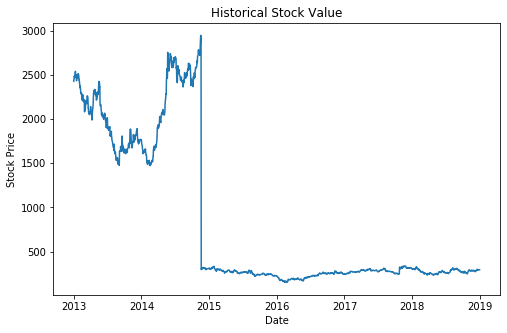

In [33]:
plt.figure(figsize=(8,5))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [34]:
# stk_data['Date'] = stk_data.index
# data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
# data2['Date'] = stk_data['Date']
# data2['Open'] = stk_data['Open']
# data2['High'] = stk_data['High']
# data2['Low'] = stk_data['Low']
# data2['Close'] = stk_data['Close']
# data2

In [35]:
data2 = stk_data.reset_index().iloc[:,[0,4,5,6,8]]
data2

,Date,Open,High,Low,Close
0,2013-01-01,2404.90,2434.05,2397.55,2426.45
1,2013-01-02,2450.00,2464.00,2438.15,2450.55
2,2013-01-03,2460.00,2482.40,2436.20,2471.60
3,2013-01-04,2460.00,2492.95,2450.65,2486.70
4,2013-01-07,2490.00,2499.00,2461.75,2467.60
...,...,...,...,...,...
1478,2018-12-24,293.50,295.00,290.15,293.05
1479,2018-12-26,292.85,295.00,287.15,294.15
1480,2018-12-27,296.70,297.60,291.50,292.15
1481,2018-12-28,293.60,297.10,293.55,294.80


In [36]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 5s 101ms/step - loss: 0.0185
Epoch 2/15
45/45 [==============================] - 5s 108ms/step - loss: 0.0083
Epoch 3/15
45/45 [==============================] - 5s 110ms/step - loss: 0.0074
Epoch 4/15
45/45 [==============================] - 6s 130ms/step - loss: 0.0072
Epoch 5/15
45/45 [==============================] - 6s 135ms/step - loss: 0.0057
Epoch 6/15
45/45 [==============================] - 5s 119ms/step - loss: 0.0072
Epoch 7/15
45/45 [==============================] - 5s 115ms/step - loss: 0.0051
Epoch 8/15
45/45 [==============================] - 6s 136ms/step - loss: 0.0060
Epoch 9/15
32/45 [====================>.........] - ETA: 1s - loss: 0.0051

In [ ]:
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()